In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gvar as gv
import lsqfit

In [2]:
df = pd.read_csv('./l4864_pion.dat',header=None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110a3ce10>]], dtype=object)

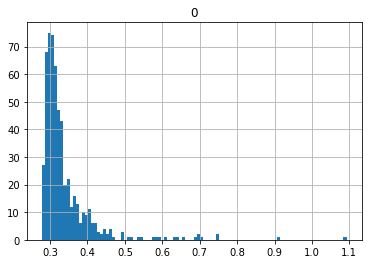

In [3]:
df.hist(column=0,bins=100)

In [13]:
gvdata = gv.dataset.avg_data(df.as_matrix())
gvdata = 0.5*(gvdata+np.roll(gvdata[::-1],-1))

In [25]:
meff = np.arccosh((np.roll(gvdata,-1)+np.roll(gvdata,1))/(2.*gvdata))
meff

/Users/cchang5/anaconda/envs/pyqcd3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([nan +- nan, 0.6838(95), 0.611(11), 0.2659(60), 0.132(14), 0.078(29),
       0.099(13), 0.094(14), 0.095(11), 0.092(11), 0.068(14), 0.0862(91),
       0.090(11), 0.0906(82), 0.069(15), 0.078(11), 0.056(18), 0.041(30),
       0.1001(82), 0.1075(90), 0.0887(86), 0.072(13), 0.073(12),
       0.0834(88), 0.0867(80), 0.075(12), 0.0798(91), 0.0966(80),
       0.079(11), 0.073(13), 0.0799(74), 0.065(40), 0.0799(74), 0.073(13),
       0.079(11), 0.0966(80), 0.0798(91), 0.075(12), 0.0867(80),
       0.0834(88), 0.073(12), 0.072(13), 0.0887(86), 0.1075(90),
       0.1001(82), 0.041(30), 0.056(18), 0.078(11), 0.069(15), 0.0906(82),
       0.090(11), 0.0862(91), 0.068(14), 0.092(11), 0.095(11), 0.094(14),
       0.099(13), 0.078(29), 0.132(14), 0.2659(60), 0.611(11), 0.6838(95),
       nan +- nan, 0.7947(70)], dtype=object)

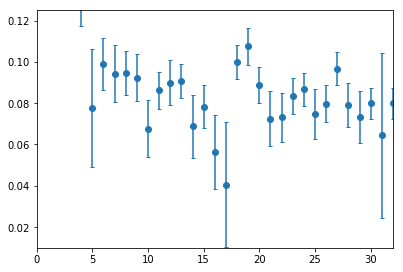

In [26]:
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
ax.errorbar(x=np.arange(len(meff)),y=[i.mean for i in meff],yerr=[i.sdev for i in meff],ls='None',marker='o',capsize=2)
ax.axis([0,32,.01,.125])
plt.draw()
plt.show()

In [28]:
scorr = gvdata * np.exp(meff*np.arange(len(gvdata)))

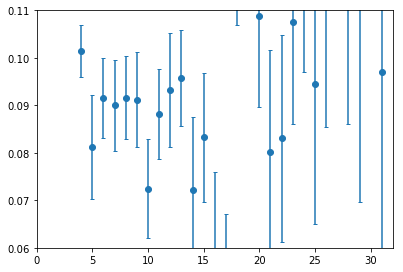

In [31]:
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
ax.errorbar(x=np.arange(len(scorr)),y=[i.mean for i in scorr],yerr=[i.sdev for i in scorr],ls='None',marker='o',capsize=2)
ax.axis([0,32,.06,.11])
plt.draw()
plt.show()

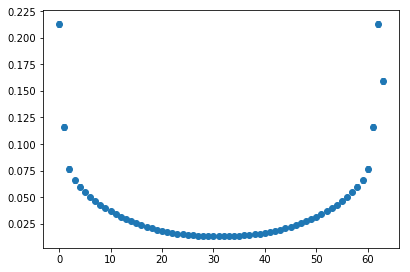

In [34]:
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
ax.errorbar(x=np.arange(len(gvdata)),y=[i.mean for i in gvdata],yerr=[i.sdev for i in gvdata],ls='None',marker='o',capsize=2)
#ax.axis([0,32,.06,.11])
plt.draw()
plt.show()

In [206]:
def fit_function(x,p):
    T =64.
    r = p['A0']*(np.exp(-p['E0']*x)+np.exp(-p['E0']*(T-x)))
    r += p['A1']*(np.exp(-p['E1']*x)+np.exp(-p['E1']*(T-x)))
    r += p['A2']*(np.exp(-p['E2']*x)+np.exp(-p['E2']*(T-x)))
    return r

In [232]:
p = dict()
p['E0'] = gv.gvar(0.08,0.04)
p['A0'] = gv.gvar(0.09,0.045)
p['log(E1)'] = gv.gvar(0.16,0.08)
p['A1'] = gv.gvar(0.09,0.045)
p['log(E2)'] = gv.gvar(0.16,0.08)
p['A2'] = gv.gvar(0.09,0.045)
r = dict()
for tmin in np.arange(2,10):
    for tmax in np.arange(20,21):
        x = np.arange(tmin,tmax)
        y = gvdata[x]
        r[(tmin,tmax)] = lsqfit.nonlinear_fit(data=(x,y),prior=p,fcn=fit_function,extend=True,svdcut=2E-2)

E0


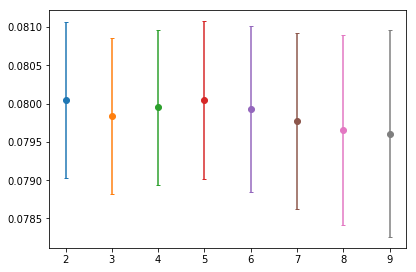

A0


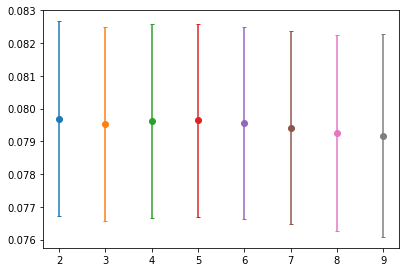

Q


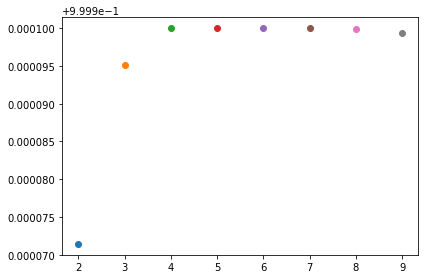

In [233]:
print('E0')
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
for tup in r.keys():
    ax.errorbar(x=int(tup[0]),y=r[tup].p['E0'].mean,yerr=r[tup].p['E0'].sdev,ls='None',marker='o',capsize=2)
#ax.axis([0,32,.06,.11])
plt.draw()
plt.show()
print('A0')
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
for tup in r.keys():
    ax.errorbar(x=int(tup[0]),y=r[tup].p['A0'].mean,yerr=r[tup].p['A0'].sdev,ls='None',marker='o',capsize=2)
#ax.axis([0,32,.06,.11])
plt.draw()
plt.show()
print('Q')
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
for tup in r.keys():
    ax.errorbar(x=int(tup[0]),y=r[tup].Q,ls='None',marker='o',capsize=2)
#ax.axis([0,32,.06,.11])
plt.draw()
plt.show()

E0


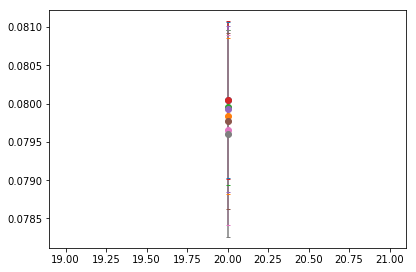

A0


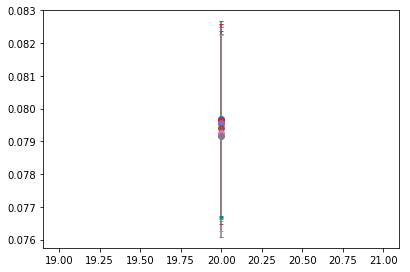

Q


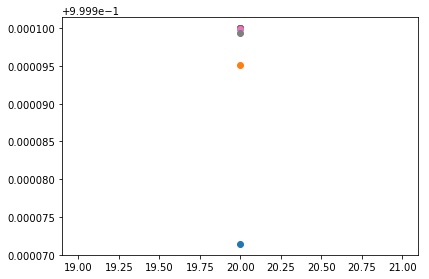

In [234]:
print('E0')
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
for tup in r.keys():
    ax.errorbar(x=int(tup[1]),y=r[tup].p['E0'].mean,yerr=r[tup].p['E0'].sdev,ls='None',marker='o',capsize=2)
#ax.axis([0,32,.06,.11])
plt.draw()
plt.show()
print('A0')
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
for tup in r.keys():
    ax.errorbar(x=int(tup[1]),y=r[tup].p['A0'].mean,yerr=r[tup].p['A0'].sdev,ls='None',marker='o',capsize=2)
#ax.axis([0,32,.06,.11])
plt.draw()
plt.show()
print('Q')
fig = plt.figure()
ax = plt.axes([0.14,0.155,0.825,0.825])
for tup in r.keys():
    ax.errorbar(x=int(tup[1]),y=r[tup].Q,ls='None',marker='o',capsize=2)
#ax.axis([0,32,.06,.11])
plt.draw()
plt.show()